In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../../3.- Datasets/iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


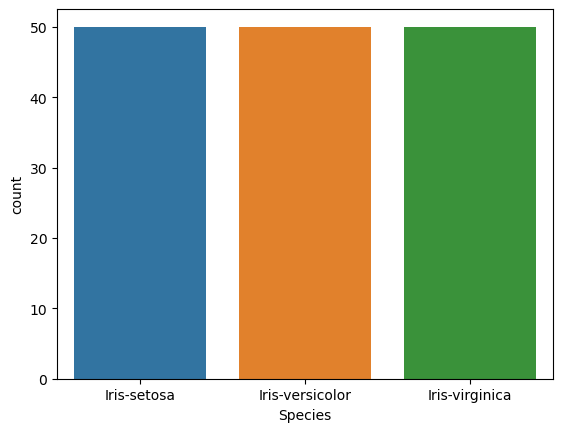

In [6]:
sns.countplot(x='Species', data=df)
plt.show()

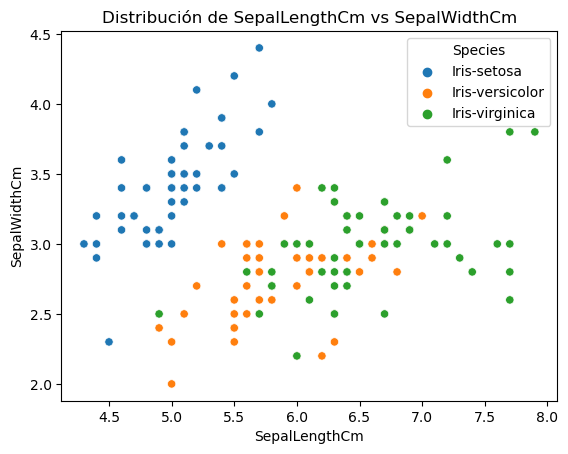

In [22]:
# Visualizar la dispersión de las características SepalLengthCm y SepalWidthCm
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='Species', data=df)
plt.title('Distribución de SepalLengthCm vs SepalWidthCm')
plt.show()

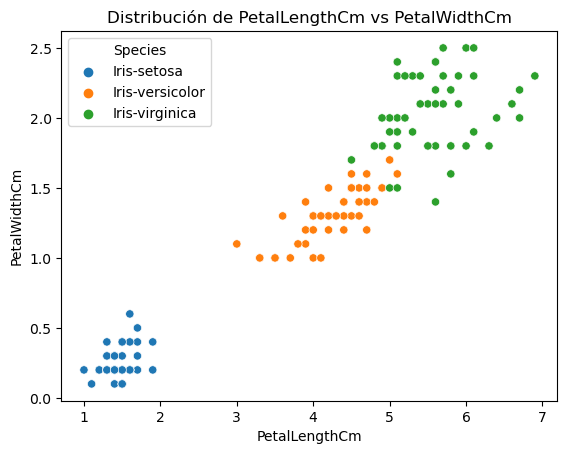

In [23]:
# Visualizar la dispersión de las características PetalLengthCm y PetalWidthCm
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', hue='Species', data=df)
plt.title('Distribución de PetalLengthCm vs PetalWidthCm')
plt.show()

In [7]:
df.isnull().any()

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

In [8]:
x = df.drop('Species', axis=1)
y = df['Species']

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [10]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

# Definimos las columnas numéricas y categóricas para cada
numeric_features = x_train.select_dtypes(include=['float64', 'int64']).columns
categorical_features = x_train.select_dtypes(include=['object']).columns

# Creamos transformers para imputación y escala
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Creamos transformer para codificación de variables categóricas
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Creamos un preprocesador que aplique los transformers apropiados a las columnas correctas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Creamos el pipeline completo
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

In [11]:
x_train_prep = pipeline.fit_transform(x_train)
x_test_prep = pipeline.transform(x_test)

In [12]:
x_train = pd.DataFrame(x_train_prep, columns=list(pd.get_dummies(x_train)), index=x_train.index)

In [13]:
x_train.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
56,-0.456460,0.561951,0.567911,0.517770,0.510360
104,0.647219,0.802788,-0.124872,1.144410,1.300784
69,-0.157547,-0.280976,-1.279510,0.062031,-0.148326
55,-0.479453,-0.160558,-0.586727,0.403835,0.115148
132,1.291032,0.682370,-0.586727,1.030476,1.300784


In [15]:
x_test = pd.DataFrame(x_test_prep, columns=list(pd.get_dummies(x_test)), index=x_test.index)

In [16]:
x_test.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
73,-0.065574,0.321115,-0.586727,0.517770,-0.016589
18,-1.330205,-0.160558,1.722548,-1.191250,-1.202225
118,0.969125,2.247806,-1.048582,1.771051,1.432522
78,0.049393,0.200697,-0.355799,0.403835,0.378623
76,0.003406,1.164042,-0.586727,0.574737,0.246886


In [17]:
y_train.head()

56     Iris-versicolor
104     Iris-virginica
69     Iris-versicolor
55     Iris-versicolor
132     Iris-virginica
Name: Species, dtype: object

In [18]:
y_train = pd.factorize(y_train)

In [19]:
y_test = pd.factorize(y_test)

In [25]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0)

In [27]:
svm.fit(x_train, y_train)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.